In [0]:
!pip install gdal
!pip install rasterio
!pip install sentinelsat

In [0]:
from sentinelsat.sentinel import SentinelAPI, read_geojson, geojson_to_wkt
import gdal
from gdalconst import GA_ReadOnly 
import matplotlib.pyplot as plt
%matplotlib inline 
import cv2
import numpy as np
from collections import Counter
from tqdm import tqdm_notebook as tqdm
IMG_SIZE=1031
import rasterio
from rasterio.plot import show
import subprocess
import os
import math

**Download CLC reference data**

In [0]:
subprocess.run(['wget', 'https://land.copernicus.eu/land-files/7ac95361f9ac3cecdf37785bc183ff02dd765a16.zip'])
subprocess.run(['unzip' ,'7ac95361f9ac3cecdf37785bc183ff02dd765a16.zip'])
subprocess.run(['unzip' ,'clc2018_clc2018_v2018_20_raster100m.zip'])
subprocess.run(['gdalwarp','-co','COMPRESS=DEFLATE','-t_srs','EPSG:32632','clc2018_clc2018_v2018_20_raster100m/CLC2018_CLC2018_V2018_20.tif','europe.tif'])


**STEP 1 : DATA PREPROCESSING**

In [0]:
def download_scene(file_id):
  api = SentinelAPI('uname', 'pwd',api_url='https://scihub.copernicus.eu/apihub')
  api.download(file_id)

def unzip_scene(file_name):
  subprocess.call('unzip '+file_name,shell=True)

def jp2_to_tif(input_file,output_file):
  subprocess.call('gdal_translate ' +input_file+' '+output_file,shell=True)

def clip_ref_scene(input_file,output_file):
  data=gdal.Open(input_file,GA_ReadOnly) 
  geoTransform=data.GetGeoTransform() 
  minx=geoTransform[0] 
  maxy=geoTransform[3] 
  maxx = minx + geoTransform[1] * data.RasterXSize 
  miny = maxy + geoTransform[5] * data.RasterYSize 
  subprocess.call('gdal_translate -projwin ' + ' '.join([str(x) for x in [minx, maxy, maxx, miny]]) + ' -of GTiff europe.tif ' +output_file, shell=True) 

def resize_scene(input_file,output_file):
  subprocess.call('gdal_translate -co QUALITY=100 -co PROGRESSIVE=ON -outsize '+str(IMG_SIZE)+' '+str(IMG_SIZE)+' -r bilinear '+input_file+' '+output_file,shell=True)

In [0]:
download_scene('742eb824-df10-4402-866e-0d92e8575aa4')
unzip_scene('/content/S2A_MSIL1C_20190723T101031_N0208_R022_T32TQQ_20190723T121220.zip')
jp2_to_tif('/content/S2A_MSIL1C_20190723T101031_N0208_R022_T32TQQ_20190723T121220.SAFE/GRANULE/L1C_T32TQQ_A021326_20190723T101347/IMG_DATA/T32TQQ_20190723T101031_TCI.jp2','test-full.tif')
clip_ref_scene('test-full.tif','test-y.tif')
resize_scene('test-full.tif','test.tif')
jp2_to_tif('/content/S2A_MSIL1C_20190723T101031_N0208_R022_T32TQQ_20190723T121220.SAFE/GRANULE/L1C_T32TQQ_A021326_20190723T101347/IMG_DATA/T32TQQ_20190723T101031_B08.jp2','test-b8-full.tif')
clip_ref_scene('test-b8-full.tif','test-b8-y.tif')
resize_scene('test-b8-full.tif','test-b8.tif')


In [0]:
download_scene('4f07815d-5709-4b0b-8fdd-7e12c78e6546')
unzip_scene('S2A_MSIL1C_20190629T103031_N0207_R108_T32UMV_20190629T124358.zip')
jp2_to_tif('/content/S2A_MSIL1C_20190629T103031_N0207_R108_T32UMV_20190629T124358.SAFE/GRANULE/L1C_T32UMV_A020983_20190629T103537/IMG_DATA/T32UMV_20190629T103031_TCI.jp2','s1-full.tif')
clip_ref_scene('s1-full.tif','s1-y.tif')
resize_scene('s1-full.tif','s1.tif')
jp2_to_tif('/content/S2A_MSIL1C_20190629T103031_N0207_R108_T32UMV_20190629T124358.SAFE/GRANULE/L1C_T32UMV_A020983_20190629T103537/IMG_DATA/T32UMV_20190629T103031_B08.jp2','s1-b8-full.tif')
clip_ref_scene('s1-b8-full.tif','s1-b8-y.tif')
resize_scene('s1-b8-full.tif','s1-b8.tif')

In [0]:
download_scene('03cf3314-1b05-46f1-af1b-cee2652edf2b')
unzip_scene('S2B_MSIL1C_20190724T103029_N0208_R108_T32UMV_20190724T122822.zip')
jp2_to_tif('/content/S2B_MSIL1C_20190724T103029_N0208_R108_T32UMV_20190724T122822.SAFE/GRANULE/L1C_T32UMV_A012432_20190724T103030/IMG_DATA/T32UMV_20190724T103029_TCI.jp2','s2-full.tif')
clip_ref_scene('s2-full.tif','s2-y.tif')
resize_scene('s2-full.tif','s2.tif')
jp2_to_tif('/content/S2B_MSIL1C_20190724T103029_N0208_R108_T32UMV_20190724T122822.SAFE/GRANULE/L1C_T32UMV_A012432_20190724T103030/IMG_DATA/T32UMV_20190724T103029_B08.jp2','s2-b8-full.tif')
clip_ref_scene('s2-b8-full.tif','s2-b8-y.tif')
resize_scene('s2-b8-full.tif','s2-b8.tif')

In [0]:
download_scene('67a87302-2ff4-4c81-9e5e-792367578f6d')
unzip_scene('S2B_MSIL1C_20190921T105739_N0208_R094_T30UYC_20190921T131721.zip')
jp2_to_tif('/content/S2B_MSIL1C_20190921T105739_N0208_R094_T30UYC_20190921T131721.SAFE/GRANULE/L1C_T30UYC_A013276_20190921T110218/IMG_DATA/T30UYC_20190921T105739_TCI.jp2','s3-full.tif')
clip_ref_scene('s3-full.tif','s3-y.tif')
resize_scene('s3-full.tif','s3.tif')
jp2_to_tif('/content/S2B_MSIL1C_20190921T105739_N0208_R094_T30UYC_20190921T131721.SAFE/GRANULE/L1C_T30UYC_A013276_20190921T110218/IMG_DATA/T30UYC_20190921T105739_B08.jp2','s3-b8-full.tif')
clip_ref_scene('s3-b8-full.tif','s3-b8-y.tif')
resize_scene('s3-b8-full.tif','s3-b8.tif')

In [0]:
download_scene('c04d2ba0-4880-4dcf-a733-879231478aa3')
unzip_scene('S2B_MSIL1C_20190724T103029_N0208_R108_T31TGN_20190724T122822.zip')
jp2_to_tif('/content/S2B_MSIL1C_20190724T103029_N0208_R108_T31TGN_20190724T122822.SAFE/GRANULE/L1C_T31TGN_A012432_20190724T103030/IMG_DATA/T31TGN_20190724T103029_TCI.jp2','s4-full.tif')
clip_ref_scene('s4-full.tif','s4-y.tif')
resize_scene('s4-full.tif','s4.tif')
jp2_to_tif('/content/S2B_MSIL1C_20190724T103029_N0208_R108_T31TGN_20190724T122822.SAFE/GRANULE/L1C_T31TGN_A012432_20190724T103030/IMG_DATA/T31TGN_20190724T103029_B08.jp2','s4-b8-full.tif')
clip_ref_scene('s4-b8-full.tif','s4-b8-y.tif')
resize_scene('s4-b8-full.tif','s4-b8.tif')

In [0]:
download_scene('4557d038-7f7e-4356-b410-5c6e7d741e7f')
unzip_scene('/content/S2A_MSIL1C_20190904T102021_N0208_R065_T32TNT_20190904T123501.zip')
jp2_to_tif('/content/S2A_MSIL1C_20190904T102021_N0208_R065_T32TNT_20190904T123501.SAFE/GRANULE/L1C_T32TNT_A021941_20190904T102045/IMG_DATA/T32TNT_20190904T102021_TCI.jp2','s5-full.tif')
clip_ref_scene('s5-full.tif','s5-y.tif')
resize_scene('s5-full.tif','s5.tif')
jp2_to_tif('/content/S2A_MSIL1C_20190904T102021_N0208_R065_T32TNT_20190904T123501.SAFE/GRANULE/L1C_T32TNT_A021941_20190904T102045/IMG_DATA/T32TNT_20190904T102021_B08.jp2','s5-b8-full.tif')
clip_ref_scene('s5-b8-full.tif','s5-b8-y.tif')
resize_scene('s5-b8-full.tif','s5-b8.tif')

In [0]:
download_scene('336a6ef0-784a-4a90-8333-02ed7ae93b85')
unzip_scene('/content/S2B_MSIL1C_20190913T100029_N0208_R122_T33TVJ_20190913T134222.zip')
jp2_to_tif('/content/S2B_MSIL1C_20190913T100029_N0208_R122_T33TVJ_20190913T134222.SAFE/GRANULE/L1C_T33TVJ_A013161_20190913T100548/IMG_DATA/T33TVJ_20190913T100029_TCI.jp2','s6-full.tif')
clip_ref_scene('s6-full.tif','s6-y.tif')
resize_scene('s6-full.tif','s6.tif')
jp2_to_tif('/content/S2B_MSIL1C_20190913T100029_N0208_R122_T33TVJ_20190913T134222.SAFE/GRANULE/L1C_T33TVJ_A013161_20190913T100548/IMG_DATA/T33TVJ_20190913T100029_B08.jp2','s6-b8-full.tif')
clip_ref_scene('s6-b8-full.tif','s6-b8-y.tif')
resize_scene('s6-b8-full.tif','s6-b8.tif')

**VISUALIZE TEST SET - PORTO VIRO REGION - ITALY**

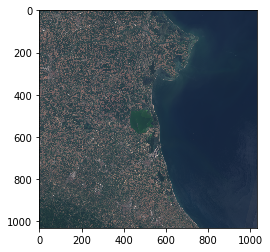

In [0]:
dataset = rasterio.open('test.tif')
show(dataset.read([1,2,3]))

In [0]:
tif1=gdal.Open('s1.tif')
s1r = tif1.GetRasterBand(1).ReadAsArray()
s1g = tif1.GetRasterBand(2).ReadAsArray()
s1b = tif1.GetRasterBand(3).ReadAsArray()
tif1=gdal.Open('s1-b8.tif')
s1b8=tif1.GetRasterBand(1).ReadAsArray()


tif1=gdal.Open('s2.tif')
s2r = tif1.GetRasterBand(1).ReadAsArray()
s2g = tif1.GetRasterBand(2).ReadAsArray()
s2b = tif1.GetRasterBand(3).ReadAsArray()
tif1=gdal.Open('s2-b8.tif')
s2b8=tif1.GetRasterBand(1).ReadAsArray()


tif1=gdal.Open('s3.tif')
s3r = tif1.GetRasterBand(1).ReadAsArray()
s3g = tif1.GetRasterBand(2).ReadAsArray()
s3b = tif1.GetRasterBand(3).ReadAsArray()
tif1=gdal.Open('s3-b8.tif')
s3b8=tif1.GetRasterBand(1).ReadAsArray()


tif1=gdal.Open('s4.tif')
s4r = tif1.GetRasterBand(1).ReadAsArray()
s4g = tif1.GetRasterBand(2).ReadAsArray()
s4b = tif1.GetRasterBand(3).ReadAsArray()
tif1=gdal.Open('s4-b8.tif')
s4b8=tif1.GetRasterBand(1).ReadAsArray()


tif1=gdal.Open('s5.tif')
s5r = tif1.GetRasterBand(1).ReadAsArray()
s5g = tif1.GetRasterBand(2).ReadAsArray()
s5b = tif1.GetRasterBand(3).ReadAsArray()
tif1=gdal.Open('s5-b8.tif')
s5b8=tif1.GetRasterBand(1).ReadAsArray()


tif1=gdal.Open('s6.tif')
s6r = tif1.GetRasterBand(1).ReadAsArray()
s6g = tif1.GetRasterBand(2).ReadAsArray()
s6b = tif1.GetRasterBand(3).ReadAsArray()
tif1=gdal.Open('s6-b8.tif')
s6b8=tif1.GetRasterBand(1).ReadAsArray()


In [0]:
tif2=gdal.Open('test-y.tif')
Y_raster_test= tif2.GetRasterBand(1).ReadAsArray()
Y_raster_test[Y_raster_test < 100] = 999
Y_raster_test[(Y_raster_test > 100)&(Y_raster_test <= 150)] = 0
Y_raster_test[(Y_raster_test > 150) & (Y_raster_test < 450)] = 125
Y_raster_test[(Y_raster_test >= 450) & (Y_raster_test < 530)] = 255
Y_raster_test[Y_raster_test > 530] = 255

In [0]:
tif2=gdal.Open('s1-y.tif')
Y_raster_s1 = tif2.GetRasterBand(1).ReadAsArray()

Y_raster_s1[Y_raster_s1 < 100] = 999
Y_raster_s1[(Y_raster_s1 > 100)&(Y_raster_s1 <= 150)] = 0
Y_raster_s1[(Y_raster_s1 > 150) & (Y_raster_s1 < 450)] = 125
Y_raster_s1[(Y_raster_s1 >= 450) & (Y_raster_s1 < 530)] = 255
Y_raster_s1[Y_raster_s1 > 530] = 255


Y_list=Y_raster_s1.flatten().tolist()
print(len(Y_list))

1062961


In [0]:
tif2=gdal.Open('s2-y.tif')
Y_raster_s2 = tif2.GetRasterBand(1).ReadAsArray()
print(np.unique(Y_raster_s2))
Y_raster_s2[Y_raster_s2 < 100] = 999
Y_raster_s2[(Y_raster_s2 > 100)&(Y_raster_s2 <= 150)] = 0
Y_raster_s2[(Y_raster_s2 > 150) & (Y_raster_s2 < 450)] = 125
Y_raster_s2[(Y_raster_s2 >= 450) & (Y_raster_s2 < 530)] = 255
Y_raster_s2[Y_raster_s2 > 530] = 255

Y_list=Y_list+(Y_raster_s2.flatten().tolist())

[111 112 121 122 123 124 131 132 133 141 142 211 221 222 231 242 243 311
 312 313 321 322 324 411 412 511 512]


In [0]:
tif2=gdal.Open('s3-y.tif')
Y_raster_s3 = tif2.GetRasterBand(1).ReadAsArray()
print(np.unique(Y_raster_s3))
Y_raster_s3[Y_raster_s3 < 100] = 999
Y_raster_s3[(Y_raster_s3 > 100)&(Y_raster_s3 <= 150)] = 0
Y_raster_s3[(Y_raster_s3 > 150) & (Y_raster_s3 < 450)] = 125
Y_raster_s3[(Y_raster_s3 >= 450) & (Y_raster_s3 < 530)] = 255
Y_raster_s3[Y_raster_s3 > 530] = 255

Y_list=Y_list+(Y_raster_s3.flatten().tolist())

[111 112 121 122 123 124 131 132 133 141 142 211 222 231 242 243 311 312
 313 321 322 324 333 411 412 511 512]


In [0]:
tif2=gdal.Open('s4-y.tif')
Y_raster_s4 = tif2.GetRasterBand(1).ReadAsArray()
print(np.unique(Y_raster_s4))
Y_raster_s4[Y_raster_s4 < 100] = 999
Y_raster_s4[(Y_raster_s4 > 100)&(Y_raster_s4 <= 150)] = 0
Y_raster_s4[(Y_raster_s4 > 150) & (Y_raster_s4 < 450)] = 125
Y_raster_s4[(Y_raster_s4 >= 450) & (Y_raster_s4 < 530)] = 255
Y_raster_s4[Y_raster_s4 > 530] = 255
 
Y_list=Y_list+(Y_raster_s4.flatten().tolist())

print(len(Y_list))

[111 112 121 122 124 131 141 142 211 231 242 243 311 312 313 321 322 324
 331 332 333 335 411 412 511 512]
4251844


In [0]:
tif2=gdal.Open('s5-y.tif')
Y_raster_s5 = tif2.GetRasterBand(1).ReadAsArray()
print(np.unique(Y_raster_s5))
Y_raster_s5[Y_raster_s5 < 100] = 999
Y_raster_s5[(Y_raster_s5 > 100)&(Y_raster_s5 <= 150)] = 0
Y_raster_s5[(Y_raster_s5 > 150) & (Y_raster_s5 < 450)] = 125
Y_raster_s5[(Y_raster_s5 >= 450) & (Y_raster_s5 < 530)] = 255
Y_raster_s5[Y_raster_s5 > 530] = 255
 
Y_list=Y_list+(Y_raster_s5.flatten().tolist())

[111 112 121 122 124 131 132 133 141 142 211 221 222 231 242 243 311 312
 313 321 322 324 331 332 333 335 411 412 511 512]


In [0]:
tif2=gdal.Open('s6-y.tif')
Y_raster_s6 = tif2.GetRasterBand(1).ReadAsArray()
print(np.unique(Y_raster_s6))
Y_raster_s6[Y_raster_s6 < 100] = 999
Y_raster_s6[(Y_raster_s6 > 100)&(Y_raster_s6 <= 150)] = 0
Y_raster_s6[(Y_raster_s6 > 150) & (Y_raster_s6 < 450)] = 125
Y_raster_s6[(Y_raster_s6 >= 450) & (Y_raster_s6 < 530)] = 255
Y_raster_s6[Y_raster_s6 > 530] = 255
 
Y_list=Y_list+(Y_raster_s6.flatten().tolist())

[-32768    111    112    121    123    124    131    142    211    212
    223    231    242    243    311    312    313    321    322    323
    324    331    332    333    523]


In [0]:
print(np.unique(Y_list))

[  0 125 255]


In [0]:
#CONVERT RGB BANDS AS INPUT FEATURE SEQUENCES
#QUANTIZATION

rband_list=s1r.flatten().tolist()
rband_list=rband_list+(s2r.flatten().tolist())
rband_list=rband_list+(s3r.flatten().tolist())
rband_list=rband_list+(s4r.flatten().tolist())
rband_list=rband_list+(s5r.flatten().tolist())
rband_list=rband_list+(s6r.flatten().tolist())



gband_list=s1g.flatten().tolist()
gband_list=gband_list+(s2g.flatten().tolist())
gband_list=gband_list+(s3g.flatten().tolist())
gband_list=gband_list+(s4g.flatten().tolist())
gband_list=gband_list+(s5g.flatten().tolist())
gband_list=gband_list+(s6g.flatten().tolist())




bband_list=s1b.flatten().tolist()
bband_list=bband_list+(s2b.flatten().tolist())
bband_list=bband_list+(s3b.flatten().tolist())
bband_list=bband_list+(s4b.flatten().tolist())
bband_list=bband_list+(s5b.flatten().tolist())
bband_list=bband_list+(s6b.flatten().tolist())



band8_list=s1b8.flatten().tolist()
band8_list=band8_list+(s2b8.flatten().tolist())
band8_list=band8_list+(s3b8.flatten().tolist())
band8_list=band8_list+(s4b8.flatten().tolist())
band8_list=band8_list+(s5b8.flatten().tolist())
band8_list=band8_list+(s6b8.flatten().tolist())


q1=max(rband_list)/16
q2=max(gband_list)/16
q3=max(bband_list)/16
q4=max(band8_list)/16


rband_list = [round(math.floor(x+0.5)/q1) for x in rband_list]
gband_list = [round(math.floor(x+0.5)/q2) for x in gband_list]
bband_list = [round(math.floor(x+0.5)/q3) for x in bband_list]
band8_list = [round(math.floor(x+0.5)/q4) for x in band8_list]



In [0]:
print(len(rband_list))

6377766


***SEQUENCE LIST AND ANTECEDENT-CONSEQUENT LIST(X->Y)***

In [0]:
sequences_list=[]
ante_consq_list=[]

In [0]:
for i in tqdm(range(len(rband_list))):
  sequences_list.append((rband_list[i],gband_list[i],bband_list[i],band8_list[i]))
  ante_consq_list.append((rband_list[i],gband_list[i],bband_list[i],band8_list[i],Y_list[i]))

print('BUILDING DATA DONE')



BUILDING DATA DONE


***RANDOM EXAMPLE - DATA STRUCTURE (R, G, B, CLASS_LABEL)***

In [0]:
print ((ante_consq_list[56]))

(3, 4, 4, 4, 125)


***FIND UNIQUE SEQUENCES(X-cap) AND COUNT***

In [0]:
print('UNIQUE SEQUENCES COUNT: ')
print(len(list(set(sequences_list))))
unique_X_sequences=list(set(sequences_list))

UNIQUE SEQUENCES COUNT: 
804




---



***STEP 2:***

*   ***ASSOCIATION ANALYSIS***
*   ***EVIDENCE BASED NORMALIZED DIFFERENTIAL INDEX(ENDI) MEASURE***




***HELPER FUNCTIONS:***

In [0]:
#ONE VARIATION OF ENDI INTERESTINGNESS MEASURE
def calculate_ENDI(positive,negative):
  if (positive==0) and (negative==0) : return 0
  return (positive-negative)/(positive+negative)

In [0]:
#POSITIVE EVIDENCES
def positive_count(sequence,class_name):
  item = list(sequence)
  item.append(class_name)
  c=counter[tuple(item)]
  return c


#NEGATIVE EVIDENCES
def negative_count(sequence, class_list):
  negative_classcount=0
  for c in  class_list:
    item = list(sequence)
    item.append(c)
    negative_classcount=negative_classcount+counter[tuple(item)]

  return negative_classcount



In [0]:
#COUNT FREQUENCIES OF EACH UNIQUE SEQUENCE
counter=Counter(ante_consq_list)

***CALCULATE ENDI MEASURE FOR ALL THE CLASSES PER SEQUENCE DATA***

In [0]:
#GENERATE A DICTIONARY OF THE FORM : {(unique sequence) : [ENDI MEASURE-CLASS 0, ENDI MEASURE-CLASS 1, ENDI MEASURE-CLASS 2 ]}
ENDI_table_dictionary={}

for i in tqdm(range(len(unique_X_sequences))):
  seq=unique_X_sequences[i]
  ENDI_class_0=calculate_ENDI(positive_count(seq,0),negative_count(seq,[125,255]))
  ENDI_class_1=calculate_ENDI(positive_count(seq,125),negative_count(seq,[0,255]))
  ENDI_class_2=calculate_ENDI(positive_count(seq,255),negative_count(seq,[0,125]))
  ENDI_table_dictionary[seq]=[ENDI_class_0,ENDI_class_1,ENDI_class_2]

print('BUILDING DICTIONARY DONE')

#PRINT RANDOM DATA POINT
#print(ENDI_table_dictionary[unique_X_sequences[5000]])



BUILDING DICTIONARY DONE




---



***STEP 3 : CLASSIFICATION AND VISUALIZATION***

In [0]:
def classification(file_name,band8filename):
          new_image=gdal.Open(file_name)
          rband_new = new_image.GetRasterBand(1).ReadAsArray()
          gband_new = new_image.GetRasterBand(2).ReadAsArray()
          bband_new = new_image.GetRasterBand(3).ReadAsArray()
          tif1=gdal.Open(band8filename)
          band8_new=tif1.GetRasterBand(1).ReadAsArray()

          rband_list_new=rband_new.flatten().tolist()
          gband_list_new=gband_new.flatten().tolist()
          bband_list_new=bband_new.flatten().tolist()
          band8_list_new=band8_new.flatten().tolist()

          q1=max(rband_list_new)/16
          q2=max(gband_list_new)/16
          q3=max(bband_list_new)/16
          q4=max(band8_list_new)/16

          rband_list_new = [round(math.floor(x+0.5)/q1) for x in rband_list_new]
          gband_list_new = [round(math.floor(x+0.5)/q2) for x in gband_list_new]
          bband_list_new = [round(math.floor(x+0.5)/q3) for x in bband_list_new]
          band8_list_new = [round(math.floor(x+0.5)/q4) for x in band8_list_new]


          final_pred_list=[]

          for i in tqdm(range(len(rband_list_new))):

            if ((rband_list_new[i],gband_list_new[i],bband_list_new[i],band8_list_new[i])) in ENDI_table_dictionary:
                  ENDI_vals=ENDI_table_dictionary[(rband_list_new[i],gband_list_new[i],bband_list_new[i],band8_list_new[i])]
                  max_val = max(ENDI_vals)
                  index_max = ENDI_vals.index(max_val)
                  final_pred_list.append(index_max)   
            else:
              final_pred_list.append(2)
          return final_pred_list



In [0]:
def visualization(prediction_list,size):
  numpy_array=np.asarray(prediction_list)
  numpy_array[numpy_array == 1] = 125
  numpy_array[numpy_array == 2] = 255
  final_image_array=numpy_array.reshape((size,size))
  print(np.unique(final_image_array))
  plt.gray()
  plt.title('PORTO VIRO REGION - CLASSIFICATION RESULTS')
  plt.imshow(final_image_array)
  plt.savefig('classification-result.png')
  cv2.imwrite("classication-result.tif", final_image_array)



In [0]:
def metrics(y_actual, y_pred_original):
    numpy_array=np.asarray(y_pred_original)
    numpy_array[numpy_array == 1] = 125
    numpy_array[numpy_array == 2] = 255
    y_pred=numpy_array.tolist()
    class_id = set(y_actual).union(set(y_pred))
    TP = []
    FP = []
    TN = []
    FN = []

    for index ,_id in enumerate(class_id):
        TP.append(0)
        FP.append(0)
        TN.append(0)
        FN.append(0)
        for i in tqdm(range(len(y_pred))):
            if y_actual[i] == y_pred[i] == _id:
                TP[index] += 1
            if y_pred[i] == _id and y_actual[i] != y_pred[i]:
                FP[index] += 1
            if y_actual[i] == y_pred[i] != _id:
                TN[index] += 1
            if y_pred[i] != _id and y_actual[i] != y_pred[i]:
                FN[index] += 1


    return class_id,TP, FP, TN, FN



---



**VISUALIZATION OF RESULTS AND METRICS - PORTO VIRO AREA(ITALY)**

1) PORTO VIRO CLASSIFICATION RESULTS

In [0]:
prediction_list=classification('test.tif','test-b8.tif')


[  0 125 255]


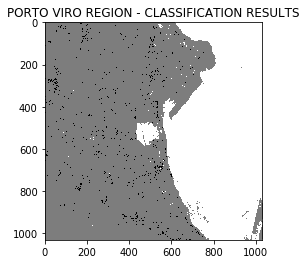

In [0]:
visualization(prediction_list,  IMG_SIZE)

In [0]:
m=metrics(Y_raster_test.flatten().tolist(),prediction_list)

In [0]:
unique, counts = np.unique(Y_raster_test.flatten().tolist(), return_counts=True)

In [0]:
for i in range(0,3):
  TP=m[1][i]
  FP=m[2][i]
  TN=m[3][i]
  FN=m[4][i]
  P=counts[i]
  N=len(Y_list)-P
  TPR=TP/P
  TNR=TN/N
  bal_measure = (TPR+TNR)/2
  inf_accuracy=TPR-TNR
  print('BALANCED ACCURACY FOR CLASS '+str(i)+" is "+ str(bal_measure))
  print('INFORMEDNESS FOR CLASS '+str(i)+" is "+str(inf_accuracy))




BALANCED ACCURACY FOR CLASS 0 is 0.14610478629102508
INFORMEDNESS FOR CLASS 0 is -0.00891469003171455
BALANCED ACCURACY FOR CLASS 1 is 0.5259777427826535
INFORMEDNESS FOR CLASS 1 is 0.9183099439101485
BALANCED ACCURACY FOR CLASS 2 is 0.4791902128988923
INFORMEDNESS FOR CLASS 2 is 0.7635858146667698


2) PORTO VIRO RGB IMAGE

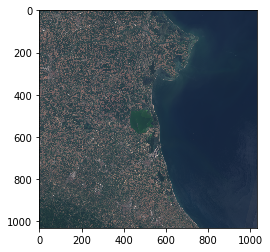

In [0]:
dataset = rasterio.open('test.tif')
show(dataset.read([1,2,3]))



---

